In [1]:
# import numpy as np
# from random import randint
# from sklearn.utils import shuffle
# from keras.models import Sequential
# from keras.layers import Dense , Activation
# from sklearn.preprocessing import MinMaxScaler

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

In [4]:
# pip install keras
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [5]:
# pip install tensorflow==1.2.0 --ignore-installed

In [6]:
train_labels=[]
train_samples=[]

In [7]:
# pip install --ignore-installed --upgrade tensorflow

### Dummy Dataset

In [8]:
for i in range(50):
#       younger people who experienced side effects
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1) 
    
#      older people who did not experienced side effects
    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    #       younger people who did not experienced side effects
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    
    #      older people who did experienced side effects
    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [9]:
# for i in train_samples:
#     print(i)

In [10]:
# for i in train_labels:
#     print(i)   
# '0' for people who did not expect side effects '1' who did expect sideEffects

In [11]:
# convert this data into np arra to pass in fit function
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)

In [12]:
# reshape data into 2D because fit function does not accept 1D
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))


In [13]:
# All the data values are b/w the range of (0-1)
# for i in scaled_train_samples:
#     print(i)

### Building Sequential Model

In [14]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Compiling model

In [16]:
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training Model

In [17]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
 - 1s - loss: 0.6898 - acc: 0.4776
Epoch 2/30
 - 1s - loss: 0.6517 - acc: 0.6405
Epoch 3/30
 - 1s - loss: 0.6168 - acc: 0.7057
Epoch 4/30
 - 1s - loss: 0.5871 - acc: 0.7429
Epoch 5/30
 - 1s - loss: 0.5588 - acc: 0.7705
Epoch 6/30
 - 1s - loss: 0.5309 - acc: 0.7938
Epoch 7/30
 - 1s - loss: 0.5017 - acc: 0.8195
Epoch 8/30
 - 1s - loss: 0.4728 - acc: 0.8405
Epoch 9/30
 - 1s - loss: 0.4435 - acc: 0.8576
Epoch 10/30
 - 1s - loss: 0.4174 - acc: 0.8652
Epoch 11/30
 - 1s - loss: 0.3944 - acc: 0.8838
Epoch 12/30
 - 1s - loss: 0.3746 - acc: 0.8900
Epoch 13/30
 - 1s - loss: 0.3575 - acc: 0.8943
Epoch 14/30
 - 1s - loss: 0.3428 - acc: 0.8990
Epoch 15/30
 - 1s - loss: 0.3306 - acc: 0.9024
Epoch 16/30
 - 1s - loss: 0.3204 - acc: 0.9114
Epoch 17/30
 - 1s - loss: 0.3115 - acc: 0.9143
Epoch 18/30
 - 1s - loss: 0.3042 - acc: 0.9171
Epoch 19/30
 - 1s - loss: 0.2981 - acc: 0.9186
Epoch 20/30
 - 1s - loss: 0.2928 - acc: 0.9219
Epoch 21/30
 - 1s - loss: 0.2887 - acc: 0.9200
Epoch 22/30
 - 1s - lo

### Creating a Validation Set using Keras

In [18]:
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
 - 1s - loss: 0.2709 - acc: 0.9328 - val_loss: 0.2366 - val_acc: 0.9333
Epoch 2/30
 - 1s - loss: 0.2700 - acc: 0.9349 - val_loss: 0.2360 - val_acc: 0.9333
Epoch 3/30
 - 1s - loss: 0.2693 - acc: 0.9302 - val_loss: 0.2347 - val_acc: 0.9333
Epoch 4/30
 - 1s - loss: 0.2682 - acc: 0.9328 - val_loss: 0.2342 - val_acc: 0.9333
Epoch 5/30
 - 1s - loss: 0.2675 - acc: 0.9328 - val_loss: 0.2332 - val_acc: 0.9333
Epoch 6/30
 - 1s - loss: 0.2668 - acc: 0.9328 - val_loss: 0.2324 - val_acc: 0.9333
Epoch 7/30
 - 1s - loss: 0.2661 - acc: 0.9333 - val_loss: 0.2316 - val_acc: 0.9333
Epoch 8/30
 - 1s - loss: 0.2654 - acc: 0.9339 - val_loss: 0.2316 - val_acc: 0.9333
Epoch 9/30
 - 1s - loss: 0.2648 - acc: 0.9333 - val_loss: 0.2307 - val_acc: 0.9333
Epoch 10/30
 - 1s - loss: 0.2644 - acc: 0.9328 - val_loss: 0.2302 - val_acc: 0.9333
Epoch 11/30
 - 1s - loss: 0.2637 - acc: 0.9328 - val_loss: 0.2293 - val_acc: 0.9333
Epoch 12/30
 - 1s - loss: 0.2634 - acc

### Test Set

In [19]:
test_lables=[]
test_samples=[]

In [20]:
for i in range(10):
    #     younger individuals who did experience side effects
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_lables.append(1)
    
      #     older individuals who did not experience side effects
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_lables.append(0)
    
for i in range(200):
    #     younger individuals who did not experience side effects
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_lables.append(0)
    
      #     older individuals who did experience side effects
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_lables.append(1)

In [21]:
### Convert the data in np_arra formate
test_lables=np.array(test_lables)
test_samples=np.array(test_samples)

# Shuffle 
test_lables, test_samples = shuffle(test_lables, test_samples)

# tranform to 2D 
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))


In [22]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)  

In [23]:
for i in predictions:
    print(i)

[0.75048643 0.24951354]
[0.9515907  0.04840927]
[0.08390112 0.91609883]
[0.9770735  0.02292643]
[0.9747576  0.02524245]
[0.07203829 0.92796177]
[0.03558223 0.96441776]
[0.97484595 0.025154  ]
[0.10503191 0.89496803]
[0.97614187 0.02385813]
[0.05282953 0.9471705 ]
[0.50510085 0.49489918]
[0.03853005 0.96146995]
[0.06670464 0.93329537]
[0.02382403 0.97617596]
[0.03032508 0.9696749 ]
[0.9515907  0.04840927]
[0.0279867 0.9720133]
[0.03558223 0.96441776]
[0.11305887 0.8869412 ]
[0.04171155 0.95828843]
[0.97362727 0.02637273]
[0.9279318  0.07206824]
[0.0279867 0.9720133]
[0.81175846 0.18824151]
[0.97681457 0.02318544]
[0.975571   0.02442907]
[0.97128546 0.02871456]
[0.07203829 0.92796177]
[0.19455664 0.80544335]
[0.06173966 0.93826026]
[0.33178285 0.6682172 ]
[0.97595304 0.02404698]
[0.11305888 0.8869411 ]
[0.41584244 0.5841575 ]
[0.03285222 0.9671478 ]
[0.97595304 0.02404698]
[0.05282953 0.9471705 ]
[0.09047642 0.9095236 ]
[0.9515907  0.04840927]
[0.07203829 0.92796177]
[0.9370471  0.062952

In [24]:
rounded_predictions=np.argmax(predictions, axis=-1)

In [25]:
# for i in rounded_predictions:
#     print(i)

In [26]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [27]:
cm = confusion_matrix(y_true=test_lables, y_pred=rounded_predictions)

In [28]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
# providing labels to confusion matrix
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[197  13]
 [ 10 200]]


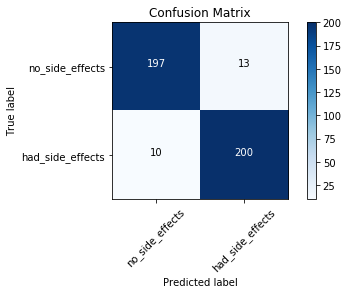

In [30]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Saving Model

In [31]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null,